<a href="https://colab.research.google.com/github/chrisszelaya/CS-3501/blob/main/CS3501_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1 

In this problem you are going to use SVD to compute an optimal rotation matrix to
align two shapes. This is known as the Orthogonal Procustes Problem (see more here:
https://en.wikipedia.org/wiki/Orthogonal_Procrustes_problem).
Load the two matrices hand1.dat and hand2.dat. They are x and y coordinates of points of
two hand shape outlines. Each row is a point, and there are 72 points, giving you two 72 × 2
matrices, A1 and A2. Now the optimal rotation that aligns hand shape 2 (A2) with hand
shape 1 (A1) with the following steps:
• Create the matrix AT
1 A2.

• Compute the SVD: USV T = AT
1 A2.

• The optimal rotation is R = UV T

Do the following:

(a) Plot the two hand shapes by connecting consecutive points with line segments. (You
might want to use two different colors for the two hands.)

(b) Perform the steps outlined above to find the optimal rotation that aligns hand 2 into
hand 1. What is the angle of rotation between these two hands?

(c) Rotate hand 2 using the optimal rotation you found. Plot the two hands again (this
time with hand 2 rotated). Do they align with each other?

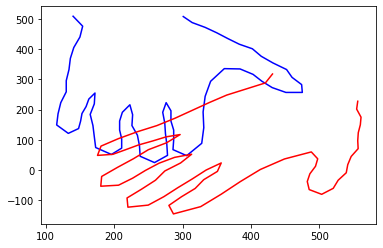

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

A1= pd.read_csv('hand1.dat', sep=',', header=None) ## 72 x 2 
A2=pd.read_csv('hand2.dat', sep=',', header=None) ## 72 x 2
A1.rename(columns={0:"x",1:"y"})
A2.rename(columns={0:"x",1:"y"})
plt.plot(A1[0], A1[1], 'b-')
plt.plot(A2[0], A2[1], 'r-')








In [ ]:
A1_T_A2= np.dot(A2.T,A1) ## 2 x 72 dot 72 x 2 

U, S, Vt = np.linalg.svd(A1_T_A2)

R= np.dot(U,Vt)

theta = np.arccos((np.trace(R) - 1) / 2)
theta_degrees = np.degrees(theta)
print(theta_degrees)

72.1376301004281


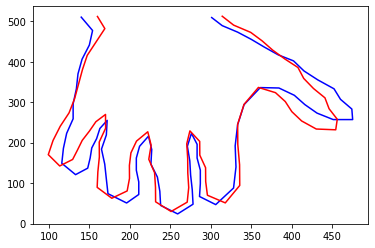

In [ ]:
A2_rotated = np.dot(A2, R)
A2_rotated= pd.DataFrame(A2_rotated)

plt.plot(A1[0],A1[1], 'b-')
plt.plot(A2_rotated[0],A2_rotated[1],'r')

# Problem 2

In this problem we will be analyzing data from the Old Faithful geyser in Yellowstone National Park. (See https://en.wikipedia.org/wiki/Old_Faithful to learn more!)
Download the provided CSV data (faithful.csv), which consists of two variables: the duration of eruptions in minutes (eruptions column) and the length of time until the next
eruption (waiting column). Hint: The function numpy.asarray() can convert a pandas
column into a numpy array.

(a) Load the eruptions column as your x variable and the waiting column as your y
variable. Plot the data with a scatter plot. Do you think there is a relationship between
eruption time and waiting time?

(b) What is the mean of the eruption time? What is the mean of the waiting time? Use
these values to center your x and y data.

(c) Using the dot product formula we discussed in class, compute the correlation of eruption
and waiting time. Does the value (and sign) of the correlation match what you would
expect from the plot?

(d) Using the formulas from lecture for ˆα and βˆ, compute the intercept and slope for a linear
regression. Now plot a scatterplot with your regression line on top of it. How does the
value and the sign of the slope compare to the correlation?

(e) Say you are watching the Old Faithful geyser, and you time an eruption to be 2.2
minutes. Based on your regression analysis, how long should you expect to wait for the
next eruption?

(f) Using the formula for the R2
statistic from class, what is the proportion of variance
explained by your regression?


## Part a 

Text(0, 0.5, 'waiting')

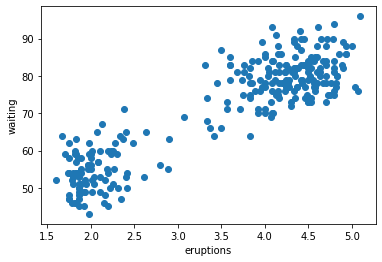

In [ ]:
faithful = pd.read_csv("faithful.csv")

X= np.asarray(faithful["eruptions"])

Y=np.asarray(faithful["waiting"])

plt.scatter(X,Y)
plt.xlabel("eruptions")
plt.ylabel("waiting")

I think there is a relationship between the waiting time and eruption time. Longer eruption times result into larger waiting times.

## Part b 

In [ ]:
eruption_mean= X.mean()
waiting_mean = Y.mean()
print("Eruption Time Mean: ", eruption_mean)
print("Waiting Time Mean: ", waiting_mean)

## Centering Data
X_centered= X - eruption_mean
Y_centered= Y- waiting_mean

Eruption Time Mean:  3.4877830882352936
Waiting Time Mean:  70.8970588235294


## Part c 

In [ ]:
## Finding correlation(x,y)
import math

dot_product = X_centered.dot(Y_centered)

mag_X= np.linalg.norm(X_centered)
mag_Y = np.linalg.norm(Y_centered)

corr = dot_product / (mag_X * mag_Y) 

print("Correlation:", corr)

Correlation: 0.900811168321813


The correlation of .90 does match my expected value since the variables seem to be going in a postive direction and appears to be strongly correlated. The sign also matches since the correlation is in the positive direction.

## Part d 

### Calculating Alpha and Beta

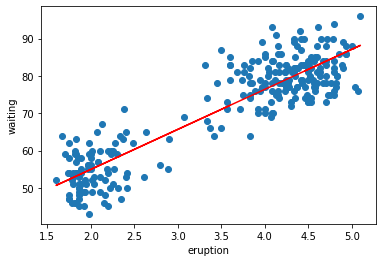

Slope : 10.729641395133525
Intercept : 33.47439702275336
Correlation : 0.900811168321813


In [ ]:
from sklearn.linear_model import LinearRegression

B = dot_product / (mag_X*mag_X)
## a = y-Bx
a = waiting_mean - (B*eruption_mean)

line = a + B*X

plt.scatter(X,Y)
plt.plot(X,line,color="red")
plt.xlabel("eruption")
plt.ylabel("waiting")
plt.show()

print("Slope :" , B)
print("Intercept :" , a)
print("Correlation :" , corr)


The value of the slope shows a large increase and it is positive which compares well to our strong and positve value for the correlations. Overall , our slope and correlation values make sense.

## Part e

In [ ]:
def predict(slope , alpha, X):
  y_pred = slope*X + alpha 
  return y_pred
prediction = predict(B, a , 2.2)
print("Predicted wait time with an eruption time of 2.2 minutes:", prediction)



Predicted wait time with an eruption time of 2.2 minutes: 57.07960809204711


If an eruption of 2.2 minutes happen we should expect to wait 57.08 minutes for the next.

## Part f 

In [ ]:
## loading predicted value
predicted_values = [predict(B,a,x) for x in X]
expected_values = Y

regression_variance = np.sum([pow((predicted-expected),2) for predicted , expected in zip(predicted_values,expected_values)])
total_variance = np.sum([pow(Y_centered,2)])

print("Regression Variance:", regression_variance)
print("Total Variance:", total_variance)

r_squared = 1 - (regression_variance/total_variance)

print("R Squared:", r_squared)


Regression Variance: 9443.387046216787
Total Variance: 50087.117647058825
R Squared: 0.8114607609733095
